In [1]:
%matplotlib inline

In [2]:
# Setup proxy as required
GA_STAFF_WIFI = False

import os
if GA_STAFF_WIFI:
    os.environ['http_proxy'] = 'http://proxy.inno.lan:3128'
    os.environ['https_proxy'] = 'http://proxy.inno.lan:3128'

In [3]:
import netCDF4
import numpy as np
from geophys_utils import NetCDFLineUtils
import matplotlib.pyplot as plt

In [4]:
#nc_path = '/g/data2/uc0/rr2_dev/rcb547/AWAGS_Levelled_Line_Databases/mag_database_reformat_2016_adjusted/netcdf/GSSA_P1255MAG_Marree.nc'
nc_path = 'http://dapds00.nci.org.au/thredds/dodsC/uc0/rr2_dev/rcb547/AWAGS_Levelled_Line_Databases/mag_database_reformat_2016_adjusted/netcdf/GSSA_P1255MAG_Marree.nc'
bounds = (137, -29, 138, -28)

In [5]:
# Initialise NetCDFLineUtils object
# Code is at https://github.com/alex-ip/geophys_utils
nc_dataset = netCDF4.Dataset(nc_path)
netcdf_line_utils = NetCDFLineUtils(nc_dataset)
netcdf_line_utils.__dict__

{'_nc_cache_dataset': <type 'netCDF4._netCDF4.Dataset'>
 root group (NETCDF4 data model, file format HDF5):
     dimensions(sizes): point(19047545), xy(2), line(819), start_end(2)
     variables(dimensions): float64 xycoords(point,xy), int32 line(line), int32 line_start_end(line,start_end)
     groups: ,
 'bounds': (136.481224,
  -29.765191000000002,
  139.52759900000001,
  -27.988115000000001),
 'crs': 'GEOGCS["GDA94",DATUM["Geocentric_Datum_of_Australia_1994",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],TOWGS84[0,0,0,0,0,0,0],AUTHORITY["EPSG","6283"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4283"]]',
 'crs_variable': <type 'netCDF4._netCDF4.Variable'>
 int32 crs()
     grid_mapping_name: latitude_longitude
     epsg_code: EPSG:4283
     semi_major_axis: 6378137.0
     inverse_flattening: 298.257222101
 unlimited dimensions: 
 current shape = ()
 filling off,
 'line': <type 'netC

In [6]:
# Test get_spatial_mask function and count the points within the bounding box
spatial_mask = netcdf_line_utils.get_spatial_mask(bounds)
np.count_nonzero(spatial_mask)

4613089

In [7]:
# Count the points in a couple of lines
for line_number, line_mask in netcdf_line_utils.get_line_masks(line_numbers=[100060, 100070]):
    print 'Line %d has %d points' % (line_number, np.count_nonzero(line_mask))

Line 100060 has 25373 points
Line 100070 has 27756 points


In [8]:
# Get all coordinates and data points for line 100060
line_number, line_dict = netcdf_line_utils.get_lines(line_numbers=100060).next()
#print line_number, line_dict

In [9]:
# Convert coordinates to UTM and compute cumulative distances in metres for line 100060
utm_distances = netcdf_line_utils.coords2metres(line_dict['coordinates'])
print utm_distances

[  0.00000000e+00   5.98434645e+00   1.19686929e+01 ...,   1.61925609e+05
   1.61932260e+05   1.61938799e+05]


mag_awags
mag_lev
mag_mlev
height


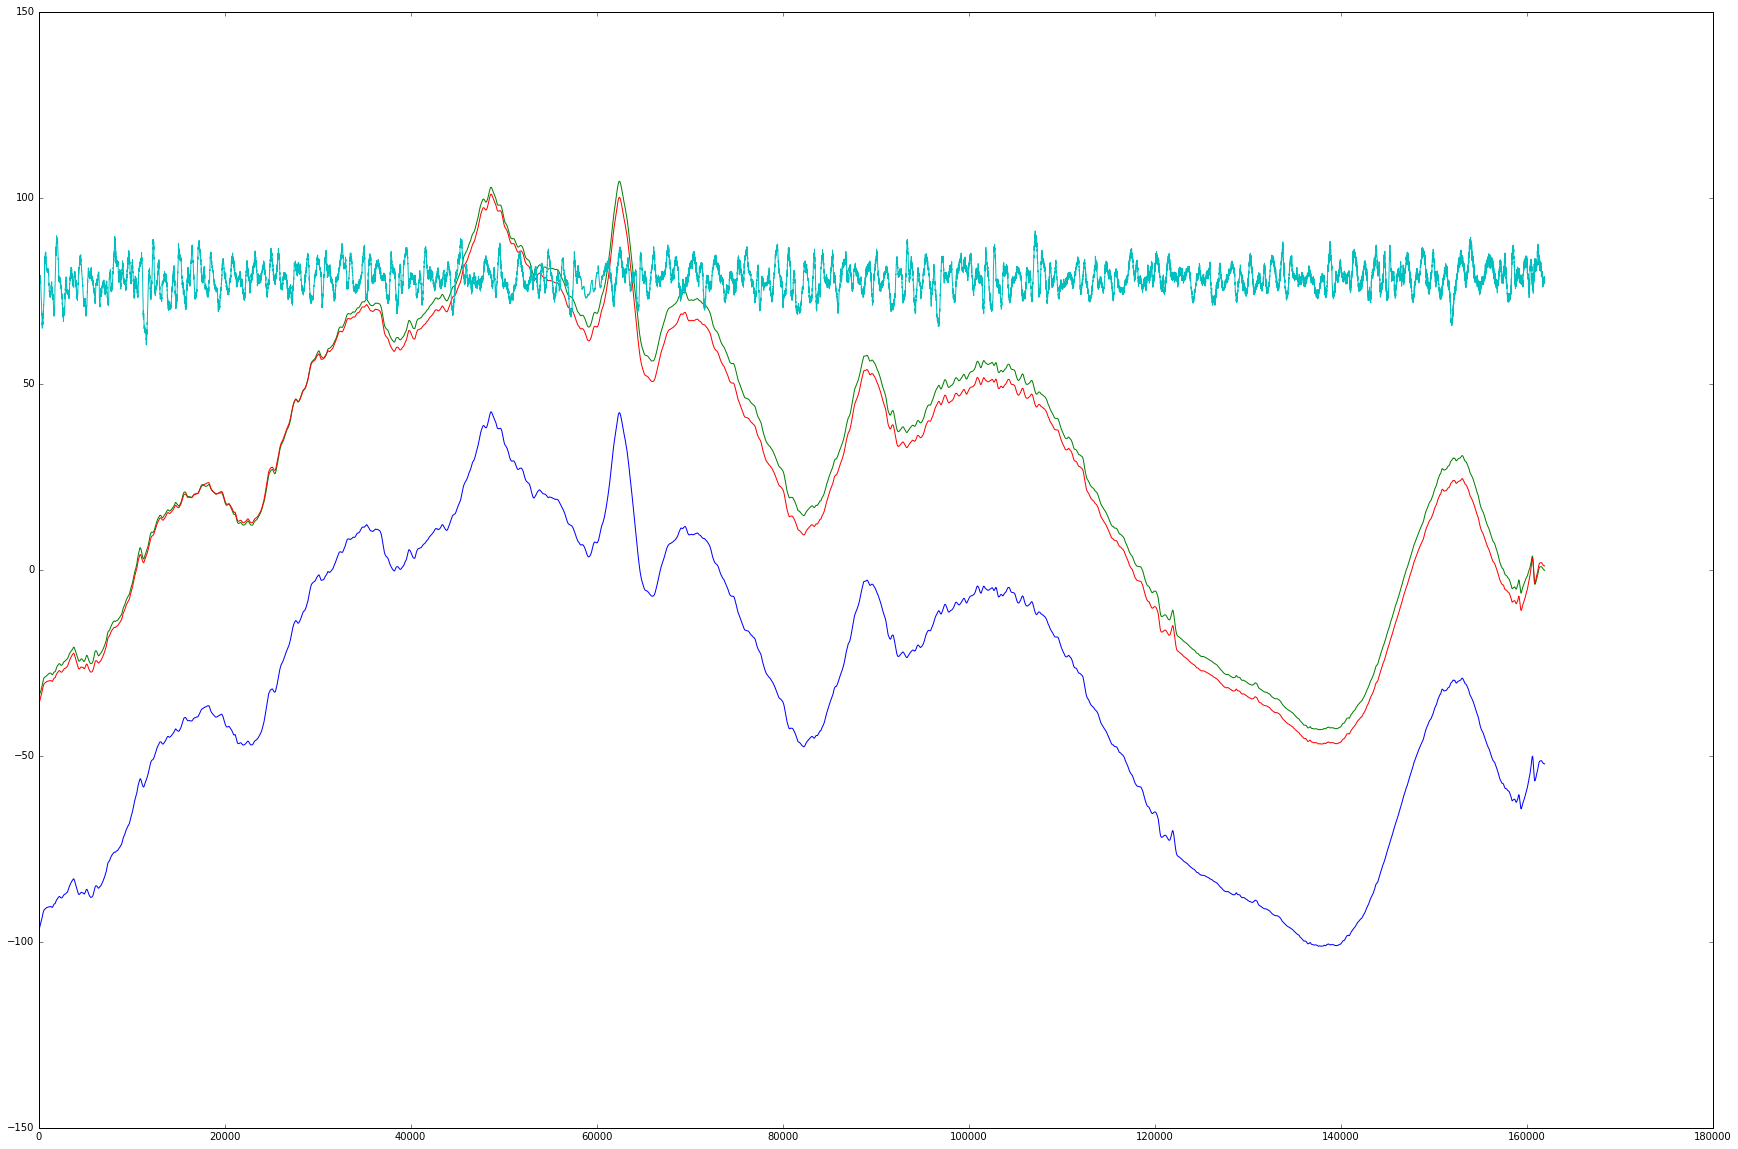

In [10]:
# Plot data points against line distance for line 100060
plt.figure(figsize=(30,20))   
for varname in line_dict.keys():
    if varname != 'coordinates':
        print varname
        plt.plot(utm_distances, line_dict[varname])

In [11]:
# Grid points to 100m resolution in UTM
utm_mag_awags_grid, crs, geotransform = netcdf_line_utils.utm_grid_points(utm_grid_resolution=100.0, 
                                               variables='mag_awags', 
                                               native_grid_bounds=bounds,
                                               point_step=1)
print crs
print geotransform
print utm_mag_awags_grid.shape

PROJCS["UTM Zone 53, Southern Hemisphere",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],TOWGS84[0,0,0,0,0,0,0],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9108"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",135],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",10000000],UNIT["Meter",1]]
[694750.0, 100.0, 0, 6901150.0, 0, -100.0]
(1129, 1003)


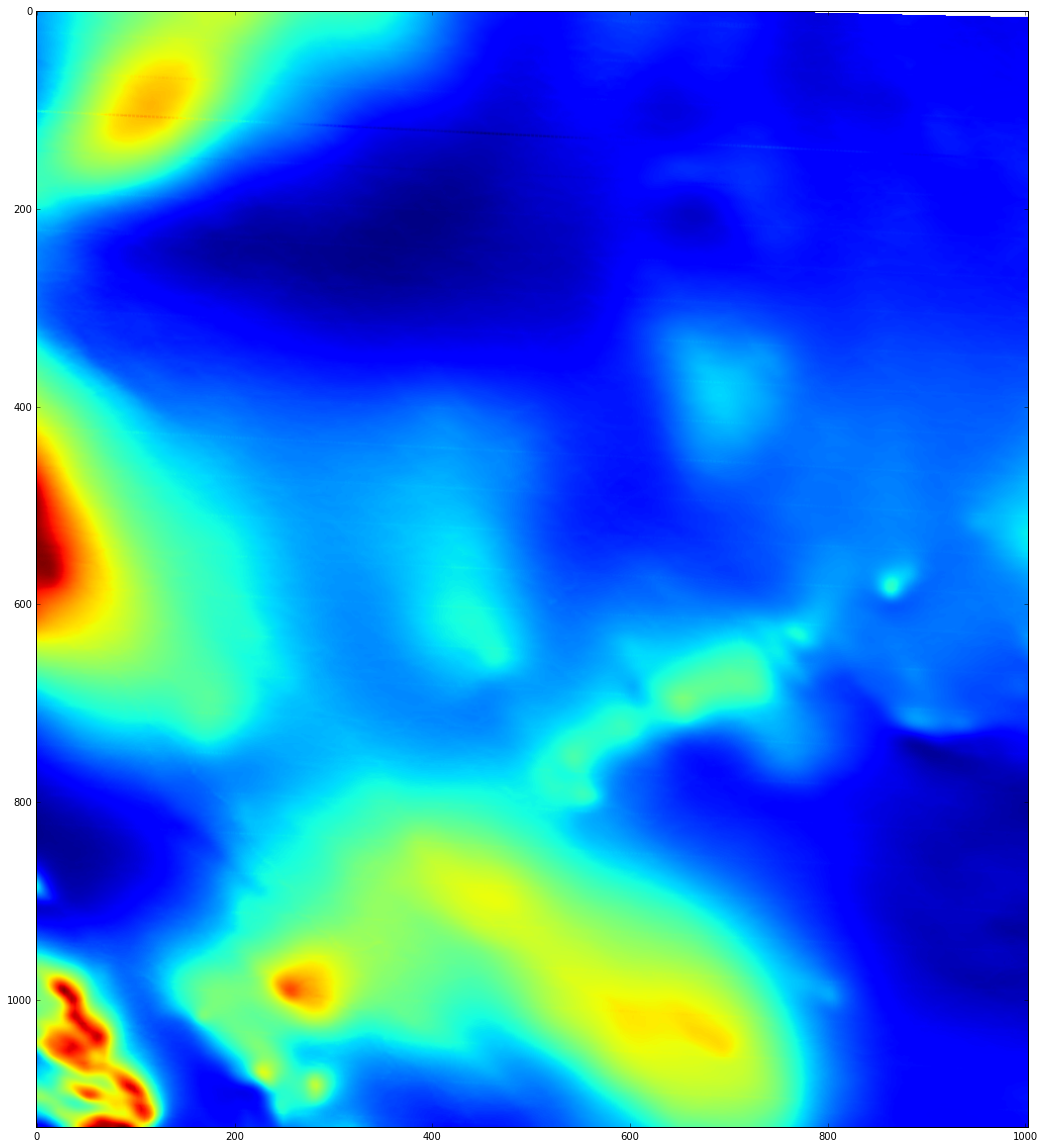

In [12]:
plt.figure(figsize=(30,20))    
plt.imshow(utm_mag_awags_grid)